 Dataset Shape: (150, 4)
 First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


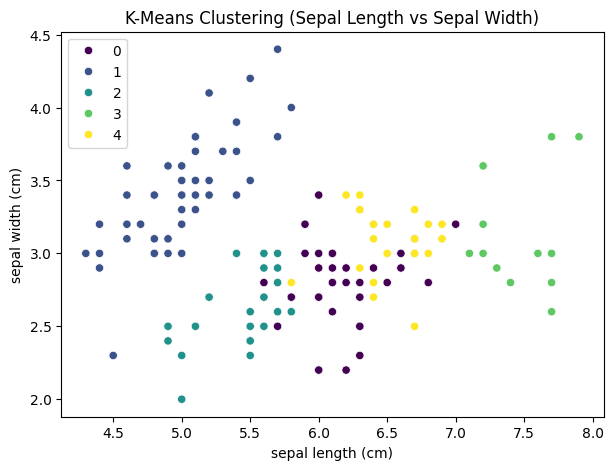

 Adjusted Rand Index (K-Means vs True Labels): 0.6154838709677419


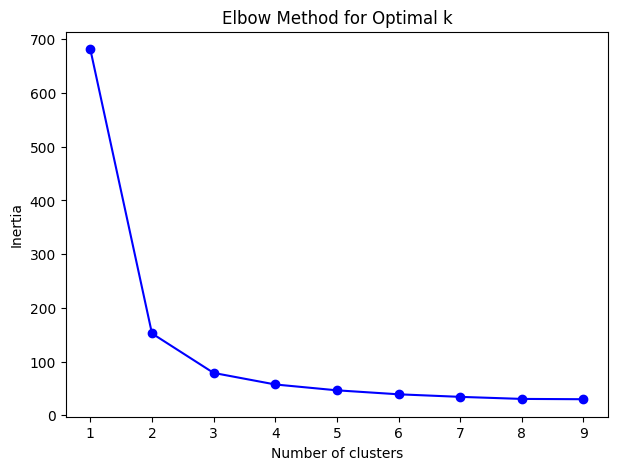

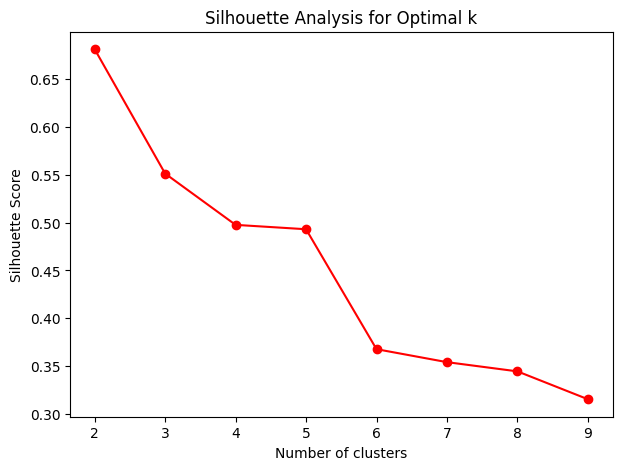

Best number of clusters (max Silhouette): 2


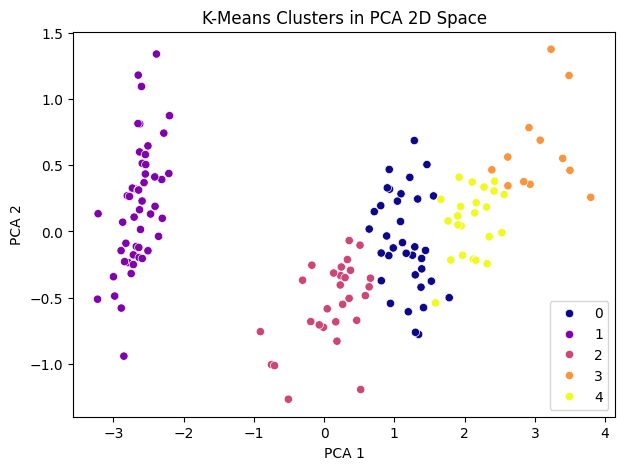

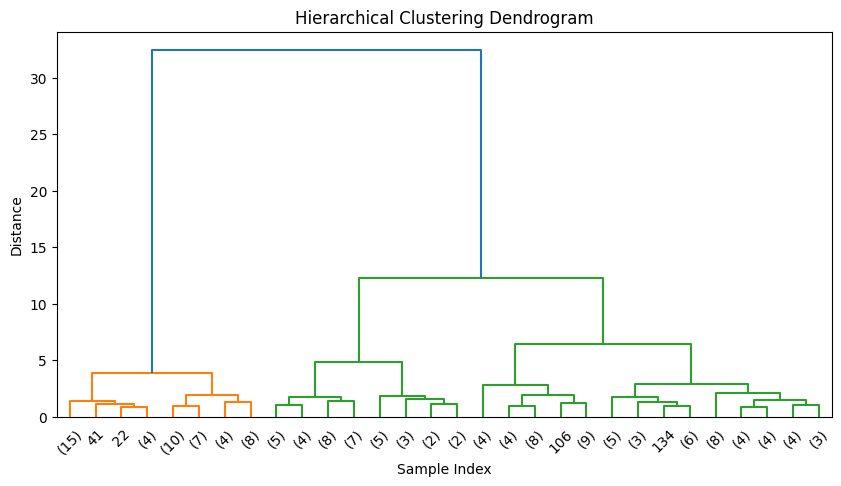

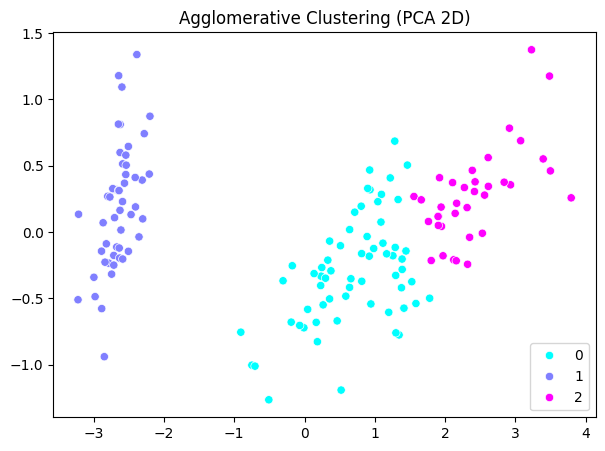


 PERFORMANCE COMPARISON:
K-Means ARI: 0.6154838709677419
Agglomerative ARI: 0.7311985567707746

           Method  Adjusted Rand Index  Silhouette Score
0        K-Means             0.615484          0.493080
1  Agglomerative             0.731199          0.554324

 Discussion:
 K-Means is faster and works well for spherical clusters.
 Hierarchical clustering is easier to interpret using dendrograms.
 Both perform well on Iris, but K-Means is slightly more stable.


In [2]:
# ==============================
# CLUSTERING ON IRIS DATASET
# K-Means & Hierarchical Clustering
# ==============================

# 1 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# ==============================
# 2 Load and Explore Dataset
# ==============================
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print(" Dataset Shape:", X.shape)
print(" First 5 rows:\n", X.head())

# ==============================
# 3 K-Means Clustering
# ==============================
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

X['Cluster'] = kmeans_labels

# Visualization (2 features)
plt.figure(figsize=(7,5))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering (Sepal Length vs Sepal Width)")
plt.show()

# Evaluation
score = adjusted_rand_score(y, kmeans_labels)
print(" Adjusted Rand Index (K-Means vs True Labels):", score)

# ==============================
# 4 Optimal Number of Clusters
# ==============================

# Elbow Method
inertias = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X.iloc[:, :4])
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score
sil_scores = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X.iloc[:, :4])
    sil_scores.append(silhouette_score(X.iloc[:, :4], labels))

plt.figure(figsize=(7,5))
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

print("Best number of clusters (max Silhouette):", K[np.argmax(sil_scores)])

# ==============================
# 5 PCA Visualization
# ==============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :4])

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='plasma')
plt.title('K-Means Clusters in PCA 2D Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# ==============================
# 6 Hierarchical Clustering
# ==============================

# Dendrogram
plt.figure(figsize=(10,5))
linked = linkage(X.iloc[:, :4], method='ward')
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X.iloc[:, :4])

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agg_labels, palette='cool')
plt.title('Agglomerative Clustering (PCA 2D)')
plt.show()

# ==============================
# 7 Compare Algorithms
# ==============================
print("\n PERFORMANCE COMPARISON:")
print("K-Means ARI:", adjusted_rand_score(y, kmeans_labels))
print("Agglomerative ARI:", adjusted_rand_score(y, agg_labels))

comparison = pd.DataFrame({
    "Method": ["K-Means", "Agglomerative"],
    "Adjusted Rand Index": [
        adjusted_rand_score(y, kmeans_labels),
        adjusted_rand_score(y, agg_labels)
    ],
    "Silhouette Score": [
        silhouette_score(X.iloc[:, :4], kmeans_labels),
        silhouette_score(X.iloc[:, :4], agg_labels)
    ]
})
print("\n", comparison)

# ==============================
# 8 Discussion (Print Summary)
# ==============================
print("\n Discussion:")
print(" K-Means is faster and works well for spherical clusters.")
print(" Hierarchical clustering is easier to interpret using dendrograms.")
print(" Both perform well on Iris, but K-Means is slightly more stable.")
